## Module Import

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## 필요 Data Set Import
* 이륜차의 배터리에 대한 정보를 담고 있는 bikeBatteryAnalysis, bikeStatus 데이터셋 Import
* 이륜차의 월별 주행 데이터를 담고 있는 bikeStatusMonthly 데이터셋 Import -> 평균 주행거리 분석 등에 사용
* 배터리 교환소에 대한 정보를 담고 있는 exchangeBatteryAnalysis, exchangeBatterySwap 데이터셋 Import
* 배터리 월별 교환 횟수 데이터를 담고 있는 exchangeBatterySwapMonthly 데이터셋 Import -> 평균 교환 횟수 분석에 사용
* 교환기 상태에 대한 정보를 담고 있는 exchangeStatus 데이터셋 Import

In [3]:
bike_battery_analysis = pd.read_csv('bikeBatteryAnalysis.csv')
bike_status = pd.read_csv('bikeStatus.csv')
bike_status_monthly = pd.read_csv('bikeStatusMonthly.csv')
exchange_battery_analysis = pd.read_csv('exchangeBatteryAnalysis.csv')
exchange_battery_swap = pd.read_csv('exchangeBatterySwap.csv')
exchange_battery_swap_monthly = pd.read_csv('exchangeBatterySwapMonthly.csv')
exchange_status = pd.read_csv('exchangeStatus.csv')

In [4]:
# 데이터 형태 확인

bike_battery_analysis

,_id,stcode,biSerial,time,status,totalMile,tripMile,gpsLat,gpsLong,speed,...,bt2Soh,bt2TempMin,bt2TempMax,bt2TempAvg,bt2Temp1,bt2Temp2,bt2Temp3,bt2Temp4,bt2CycleLife,_class
0,84524080,0,M2226B0018,1680158475000,1,258469,258469,HKaSCCg0o6y6ZAw5D4J6R2hssvsoX3P9QOQMDuOMwY/v2c...,cl4XnFIZigglsfXF2HANocDkfvkSc3ZiC9m+F5+AqTrM+u...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
1,84524079,0,M2226B0018,1680158473000,1,258469,258469,qlRMMw1iD/ToaFhC2CQYjXsZjGcmJjCqOIyy+2l8cnbnz1...,5UUgQfWPY7+GUOk8o4L5dw0AQo7SHFnGhvaw6PXiRUIbQX...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
2,84524078,0,M2226B0018,1680158471000,1,258469,258469,WJUABujpJDaE9F6L6JxTzkt6ra+Qvkpl8lPgRV8ehAG1DM...,E0H/BUTd92jVMEuaqcTsg6rtkbrkW1WB66L8xo33zCR6lQ...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
3,84524077,0,MZBAYB0540,1680158473000,1,49080,0,ZfBM5bxA2QOQvWKXVszA4xmIrlsR4hxkxFPKWqietrByVr...,1hAUnZxHLqMSC9u98ZOx4kAYWtC0Xp55gB+47kk8yPmYtG...,0,...,998,302,305,303.75,302,305,304,304,10,com.aromit.smartbattery.middleware.mongo.domai...
4,84524076,0,M2226B0018,1680158467000,1,258469,258469,9C+SEOT55Hh2Cxl2joG8wlG5+4CMVIlVwF5ARlwxOoca//...,EyqgiatNnUS/WihGEYR0+Qr9cJKF6QoDiumG2xZjNQzliw...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,84504085,0,M2226B0018,1680155975000,1,258395,258395,fcolXK9fq49miJzG+5v1VbTGqGtTMxc7IRFRt7azRyVbSR...,s88SV9CczvDP+mvDXcTcfbYXeG4Jgupol5QvNytYd7Df9A...,36,...,998,226,227,226.50,226,227,226,227,14,com.aromit.smartbattery.middleware.mongo.domai...
19996,84504084,0,MZBAYB0540,1680155978000,1,48988,0,A8siL77EMbgmKMpyex90qG0ZZwO/JjQBMKfem/bwg4IKVn...,35oTB9yRz6VAfzhxifPSgoxsPPMt6oWg7lGgKJuKJt6nDN...,28,...,998,265,268,266.75,265,267,267,268,10,com.aromit.smartbattery.middleware.mongo.domai...
19997,84504083,0,M2226B0018,1680155972000,1,258394,258394,UF+3u8hLKSFa4mLFgFccwvMOazhWlDl2HUPbMtGMK+1APA...,+NqOsFL1/EOEuiDsSlq+hdVU7lX/+Tfbv+RbmsOvjZEOZ3...,37,...,998,226,227,226.50,226,227,226,227,14,com.aromit.smartbattery.middleware.mongo.domai...
19998,84504082,0,MZBAYB0540,1680155975000,1,48988,0,vH6oQ8kIb0KjRuvuN2t3UgUiARohWZHkCsiVF7hX2E1Qcq...,oMz4Luw4YMlyACvsv3zCSAZCeTkN/Mdxq6+MkdRyrY3YoR...,8,...,998,266,268,267.00,266,267,267,268,10,com.aromit.smartbattery.middleware.mongo.domai...


## Time Column 전처리
* 모든 데이터셋의 Time 데이터는 Unix Time millisecond 형태로 되어있음 -> datetime 형식으로 변환 진행

In [5]:
bike_battery_analysis['time'] = pd.to_datetime(bike_battery_analysis['time'], unit='ms')
bike_status['time'] = pd.to_datetime(bike_status['time'], unit='ms')
bike_status_monthly['time'] = pd.to_datetime(bike_status_monthly['time'], unit='ms')
# 'inTime' Column 역시 형변환 필요
exchange_battery_analysis['time'] = pd.to_datetime(exchange_battery_analysis['time'], unit='ms')
exchange_battery_analysis['inTime'] = pd.to_datetime(exchange_battery_analysis['inTime'], unit='ms')
# 'inStTime', 'inEndTIme', 'outEndTIme' 역시 형변환 진행
exchange_battery_swap['time'] = pd.to_datetime(exchange_battery_swap['time'], unit='ms')
exchange_battery_swap['inStTime'] = pd.to_datetime(exchange_battery_swap['inStTime'], unit='ms')
exchange_battery_swap['inEndTime'] = pd.to_datetime(exchange_battery_swap['inEndTime'], unit='ms')
exchange_battery_swap['outEndTime'] = pd.to_datetime(exchange_battery_swap['outEndTime'], unit='ms')
exchange_battery_swap_monthly['time'] = pd.to_datetime(exchange_battery_swap_monthly['time'], unit='ms')
exchange_status['time'] = pd.to_datetime(exchange_status['time'], unit='ms')

In [6]:
# Time 형변환 후 데이터 재확인

bike_battery_analysis

,_id,stcode,biSerial,time,status,totalMile,tripMile,gpsLat,gpsLong,speed,...,bt2Soh,bt2TempMin,bt2TempMax,bt2TempAvg,bt2Temp1,bt2Temp2,bt2Temp3,bt2Temp4,bt2CycleLife,_class
0,84524080,0,M2226B0018,2023-03-30 06:41:15,1,258469,258469,HKaSCCg0o6y6ZAw5D4J6R2hssvsoX3P9QOQMDuOMwY/v2c...,cl4XnFIZigglsfXF2HANocDkfvkSc3ZiC9m+F5+AqTrM+u...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
1,84524079,0,M2226B0018,2023-03-30 06:41:13,1,258469,258469,qlRMMw1iD/ToaFhC2CQYjXsZjGcmJjCqOIyy+2l8cnbnz1...,5UUgQfWPY7+GUOk8o4L5dw0AQo7SHFnGhvaw6PXiRUIbQX...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
2,84524078,0,M2226B0018,2023-03-30 06:41:11,1,258469,258469,WJUABujpJDaE9F6L6JxTzkt6ra+Qvkpl8lPgRV8ehAG1DM...,E0H/BUTd92jVMEuaqcTsg6rtkbrkW1WB66L8xo33zCR6lQ...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
3,84524077,0,MZBAYB0540,2023-03-30 06:41:13,1,49080,0,ZfBM5bxA2QOQvWKXVszA4xmIrlsR4hxkxFPKWqietrByVr...,1hAUnZxHLqMSC9u98ZOx4kAYWtC0Xp55gB+47kk8yPmYtG...,0,...,998,302,305,303.75,302,305,304,304,10,com.aromit.smartbattery.middleware.mongo.domai...
4,84524076,0,M2226B0018,2023-03-30 06:41:07,1,258469,258469,9C+SEOT55Hh2Cxl2joG8wlG5+4CMVIlVwF5ARlwxOoca//...,EyqgiatNnUS/WihGEYR0+Qr9cJKF6QoDiumG2xZjNQzliw...,0,...,998,251,253,252.25,252,253,251,253,14,com.aromit.smartbattery.middleware.mongo.domai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,84504085,0,M2226B0018,2023-03-30 05:59:35,1,258395,258395,fcolXK9fq49miJzG+5v1VbTGqGtTMxc7IRFRt7azRyVbSR...,s88SV9CczvDP+mvDXcTcfbYXeG4Jgupol5QvNytYd7Df9A...,36,...,998,226,227,226.50,226,227,226,227,14,com.aromit.smartbattery.middleware.mongo.domai...
19996,84504084,0,MZBAYB0540,2023-03-30 05:59:38,1,48988,0,A8siL77EMbgmKMpyex90qG0ZZwO/JjQBMKfem/bwg4IKVn...,35oTB9yRz6VAfzhxifPSgoxsPPMt6oWg7lGgKJuKJt6nDN...,28,...,998,265,268,266.75,265,267,267,268,10,com.aromit.smartbattery.middleware.mongo.domai...
19997,84504083,0,M2226B0018,2023-03-30 05:59:32,1,258394,258394,UF+3u8hLKSFa4mLFgFccwvMOazhWlDl2HUPbMtGMK+1APA...,+NqOsFL1/EOEuiDsSlq+hdVU7lX/+Tfbv+RbmsOvjZEOZ3...,37,...,998,226,227,226.50,226,227,226,227,14,com.aromit.smartbattery.middleware.mongo.domai...
19998,84504082,0,MZBAYB0540,2023-03-30 05:59:35,1,48988,0,vH6oQ8kIb0KjRuvuN2t3UgUiARohWZHkCsiVF7hX2E1Qcq...,oMz4Luw4YMlyACvsv3zCSAZCeTkN/Mdxq6+MkdRyrY3YoR...,8,...,998,266,268,267.00,266,267,267,268,10,com.aromit.smartbattery.middleware.mongo.domai...


## 데이터셋 분석 진행
#### 분석은 다음과 같은 과정으로 진행됩니다.
#### 1) 유의미한 column 추출
#### 2) 데이터셋 분석 진행

## 1. bikeBatteryAnalysis 분석 진행


### 1) 유의미한 column 추출
#### 사용 column과 이유는 다음과 같습니다.
* biSerial: 배터리를 사용하는 이륜차를 특정하기 위해 사용
* time: 데이터의 시점을 파악하기 위해 사용
* status: 이륜차의 시동이 걸려있는지 파악하기 위해 사용
* totalMile: 총 주행거리의 시간대별 변화를 통해 이동거리를 파악하기 위해 사용
* tripMile: 총 주행거리의 시간대별 변화를 통해 이동거리를 파악하기 위해 사용 (데이터의 정확한 의미 파악 필요)
* gpsLat: 배터리 위치 파악을 위해 사용
* gpsLong : 배터리 위치 파악을 위해 사용
* bt1Soc: 배터리 전력량 변화 파악을 위해 사용
* bt2Soc: 배터리 전력량 변화 파악을 위해 사용

In [7]:
bike_battery_analysis_necessary = bike_battery_analysis[['biSerial', 'time', 'status', 'totalMile', 'tripMile', 'gpsLat', 'gpsLong', 'bt1Soc', 'bt2Soc']]
bike_battery_analysis_necessary

,biSerial,time,status,totalMile,tripMile,gpsLat,gpsLong,bt1Soc,bt2Soc
0,M2226B0018,2023-03-30 06:41:15,1,258469,258469,HKaSCCg0o6y6ZAw5D4J6R2hssvsoX3P9QOQMDuOMwY/v2c...,cl4XnFIZigglsfXF2HANocDkfvkSc3ZiC9m+F5+AqTrM+u...,717,711
1,M2226B0018,2023-03-30 06:41:13,1,258469,258469,qlRMMw1iD/ToaFhC2CQYjXsZjGcmJjCqOIyy+2l8cnbnz1...,5UUgQfWPY7+GUOk8o4L5dw0AQo7SHFnGhvaw6PXiRUIbQX...,717,711
2,M2226B0018,2023-03-30 06:41:11,1,258469,258469,WJUABujpJDaE9F6L6JxTzkt6ra+Qvkpl8lPgRV8ehAG1DM...,E0H/BUTd92jVMEuaqcTsg6rtkbrkW1WB66L8xo33zCR6lQ...,717,711
3,MZBAYB0540,2023-03-30 06:41:13,1,49080,0,ZfBM5bxA2QOQvWKXVszA4xmIrlsR4hxkxFPKWqietrByVr...,1hAUnZxHLqMSC9u98ZOx4kAYWtC0Xp55gB+47kk8yPmYtG...,647,642
4,M2226B0018,2023-03-30 06:41:07,1,258469,258469,9C+SEOT55Hh2Cxl2joG8wlG5+4CMVIlVwF5ARlwxOoca//...,EyqgiatNnUS/WihGEYR0+Qr9cJKF6QoDiumG2xZjNQzliw...,717,711
...,...,...,...,...,...,...,...,...,...
19995,M2226B0018,2023-03-30 05:59:35,1,258395,258395,fcolXK9fq49miJzG+5v1VbTGqGtTMxc7IRFRt7azRyVbSR...,s88SV9CczvDP+mvDXcTcfbYXeG4Jgupol5QvNytYd7Df9A...,833,828
19996,MZBAYB0540,2023-03-30 05:59:38,1,48988,0,A8siL77EMbgmKMpyex90qG0ZZwO/JjQBMKfem/bwg4IKVn...,35oTB9yRz6VAfzhxifPSgoxsPPMt6oWg7lGgKJuKJt6nDN...,807,803
19997,M2226B0018,2023-03-30 05:59:32,1,258394,258394,UF+3u8hLKSFa4mLFgFccwvMOazhWlDl2HUPbMtGMK+1APA...,+NqOsFL1/EOEuiDsSlq+hdVU7lX/+Tfbv+RbmsOvjZEOZ3...,834,829
19998,MZBAYB0540,2023-03-30 05:59:35,1,48988,0,vH6oQ8kIb0KjRuvuN2t3UgUiARohWZHkCsiVF7hX2E1Qcq...,oMz4Luw4YMlyACvsv3zCSAZCeTkN/Mdxq6+MkdRyrY3YoR...,808,804


### 2) 데이터셋 분석 진행
* 데이터의 특성상 평균 등의 통계량을 보는 것은 크게 의미가 없을 것이라 판단
* 하나의 biSerial에 대한 값 변화를 확인해보며 time 주기 파악과 이동거리에 따른 전력량 변화 등에 집중

In [8]:
# biSerial의 Unique 개수 파악을 통해 데이터셋의 이륜차 개수 파악

len(bike_battery_analysis_necessary['biSerial'].unique())

103

* 데이터셋의 이륜차 대수는 103대임

In [9]:
# 데이터의 이상치 파악

print("totalMile's max:", bike_battery_analysis_necessary['totalMile'].max())
print("totalMile's min:", bike_battery_analysis_necessary['totalMile'].min())
print("bt1Soc's max:", bike_battery_analysis_necessary['bt1Soc'].max())
print("bt1Soc's min:", bike_battery_analysis_necessary['bt1Soc'].min())
print("bt2Soc's max:", bike_battery_analysis_necessary['bt2Soc'].max())
print("bt2Soc's min:", bike_battery_analysis_necessary['bt2Soc'].min())

totalMile's max: 5649426
totalMile's min: 0
bt1Soc's max: 1002
bt1Soc's min: 0
bt2Soc's max: 1002
bt2Soc's min: 0


* 젠트로피의 1호차는 2022년8월17일 출고 -> 8개월만에 56만KM 주행한 사실에 대해서는 확인 필요

In [10]:
# 'MZBAYB0540' 시리얼을 가진 이륜차에 집중

bike_battery_analysis_sample = bike_battery_analysis_necessary[bike_battery_analysis_necessary['biSerial']=='MZBAYB0540']
bike_battery_analysis_sample

,biSerial,time,status,totalMile,tripMile,gpsLat,gpsLong,bt1Soc,bt2Soc
3,MZBAYB0540,2023-03-30 06:41:13,1,49080,0,ZfBM5bxA2QOQvWKXVszA4xmIrlsR4hxkxFPKWqietrByVr...,1hAUnZxHLqMSC9u98ZOx4kAYWtC0Xp55gB+47kk8yPmYtG...,647,642
5,MZBAYB0540,2023-03-30 06:41:11,1,49080,0,aoRbkxiVhKmNOU9UcJeG0IMl4q3shh0sbCd6MOH+EDXo2C...,/rYl5LumAhQ/Ufhu49Mrk6hthw6U6pOwISUdYKufsvkVvM...,647,642
8,MZBAYB0540,2023-03-30 06:41:08,1,49080,0,AUDIgw7mXFbNPK9bo+TGl6ZhoziMkHU3sZ49TsAwqcqho9...,IsYM7aO9TJVXcHdr7mhNg73YFYFcFFHCtrkwcfs3nOwdyh...,647,642
11,MZBAYB0540,2023-03-30 06:41:06,1,49080,0,1DyrhLu0FoTMkKNO3gP4OWdjMUoxlVtNFMzbX0KQVMgC/G...,l7vKPFppYFTOsg59SAP/zlsEWRBXkf7Qd6ovZnC7G1RZpZ...,647,642
13,MZBAYB0540,2023-03-30 06:41:03,1,49080,0,Lyr2oumHfhcA14gtg/RpFmRIBkTVxpIeOdAlYaHebvZwXg...,KUjsQKcKeXN1r49fQ7IYksSZqjrSYn8u7rVf9PdnOrSj/L...,647,642
...,...,...,...,...,...,...,...,...,...
19989,MZBAYB0540,2023-03-30 05:59:45,1,48988,0,XUTaD5EqYMR6bPiOGkWX8PdWps2smqLOD0/aBeiG+nvsWG...,w23mgOq7LOPyPrG3sR/ClqGYuppw1Y+aVldaST/GybRwPb...,807,802
19992,MZBAYB0540,2023-03-30 05:59:43,1,48988,0,NlPcRNpxByl12X0iTcjxuCYXjjLDBHmCDrfGltWfACJE1g...,DoaWMXByZVLYQ1728KudrKBBGMKQcDTv00rtPLxCIaB4go...,807,803
19994,MZBAYB0540,2023-03-30 05:59:40,1,48988,0,/ZDOKQ4kfzLqCGuXeK0e/sFn8k5Xuf9FErgTzxUbot/Ed2...,yVkThpcBZofFmWL4bX+OE1I8ZIJIba2kASJ/gwjKdZeaQu...,807,803
19996,MZBAYB0540,2023-03-30 05:59:38,1,48988,0,A8siL77EMbgmKMpyex90qG0ZZwO/JjQBMKfem/bwg4IKVn...,35oTB9yRz6VAfzhxifPSgoxsPPMt6oWg7lGgKJuKJt6nDN...,807,803


#### 데이터는 2~3초에 한 번씩 들어옴을 확인. totalMile이 변화하는 값을 통해 주행하는 거리에 대한 파악도 가능함. bt1Soc와 bt2Soc의 변화를 통해 배터리 전력량의 변화 역시 파악할 수 있음을 확인

In [11]:
print("time diff:", bike_battery_analysis_sample.iloc[0,1] - bike_battery_analysis_sample.iloc[-1,1])
print("totalMile diff:", bike_battery_analysis_sample.iloc[0,3] - bike_battery_analysis_sample.iloc[-1,3])
print("bt1Soc diff:", bike_battery_analysis_sample.iloc[-1,-2] - bike_battery_analysis_sample.iloc[0,-2])
print("bt2Soc diff:", bike_battery_analysis_sample.iloc[-1,-1] - bike_battery_analysis_sample.iloc[0,-1])

time diff: 0 days 00:41:38
totalMile diff: 92
bt1Soc diff: 161
bt2Soc diff: 162


#### 해당 사용자가 41분 38초동안 9.2km를 이동했으며, 이 때 배터리 1은 16.1%, 배터리 2는 16.2%의 전력량만큼 사용했음을 알 수 있다.
* 다른 사용자 역시 해당 방식을 통해 비슷한 분석이 가능함

## 2. bikeStatus 분석 진행

### 1) 유의미한 column 추출
#### 사용 column과 이유는 다음과 같습니다.
* biSerial: 배터리를 사용하는 이륜차를 특정하기 위해 사용
* time: 데이터의 시점을 파악하기 위해 사용
* status: 이륜차의 시동이 걸려있는지 파악하기 위해 사용
* totalMile: 총 주행거리의 시간대별 변화를 통해 이동거리를 파악하기 위해 사용
* tripMile: 총 주행거리의 시간대별 변화를 통해 이동거리를 파악하기 위해 사용 (데이터의 정확한 의미 파악 필요)
* gpsLat: 배터리 위치 파악을 위해 사용
* gpsLong : 배터리 위치 파악을 위해 사용
* bt1Soc: 배터리 전력량 변화 파악을 위해 사용
* bt2Soc: 배터리 전력량 변화 파악을 위해 사용

In [12]:
bike_status_necessary = bike_status[['biSerial', 'time', 'status', 'totalMile', 'tripMile', 'gpsLat', 'gpsLong', 'bt1Soc', 'bt2Soc']]
bike_status_necessary

,biSerial,time,status,totalMile,tripMile,gpsLat,gpsLong,bt1Soc,bt2Soc
0,M2227Y0008,2023-03-30 06:41:43,1,187527,187527,Dq1M6ovONGL6DgVmhAAqGFIoCKpyWb2DFHjq6HDSjoFh8d...,ffhBL2Y2/iXcPAuIB7tw2pEGPgpdjNXLPRjg/qfLiVbLH8...,455,447
1,M2227Y0008,2023-03-30 06:41:40,1,187527,187527,xd8/UpYwquJUuSGJc1QUBdT/BfTquYU80EwkCNLRzCgHsa...,Jz/3iZu0cRieVDjcU6GhMTUit8FDJeIsgGNsyxr++pfh15...,455,447
2,M2227Y0008,2023-03-30 06:41:38,1,187527,187527,Cr5YtBi+p+PvwiL8jhySv0cuAN25dvIYAdmo2p8a5SPYNL...,1RaHqMS2KMN/qSvgrlaj7GhW7Vt3Oj8XOLWyKDIZG2isI8...,455,447
3,MZBATB0524,2023-03-30 06:41:57,1,154449,154449,CcmxOYKYCJHwqASoZDXUxH47bDrhOrSm1ct0oz+PqPpxuI...,LI2B2BKG5b+hMRTIlHcNWxdI44gC4PpE4SiMtIL8lKL+t3...,869,872
4,M2227Y0008,2023-03-30 06:41:35,1,187527,187527,LzXuDeHHz+YFypYgNR87tPCFv5pEcUvz3QZpufEoEJSIeN...,jok4aMcQnGUFyGwDuXx5IlPiqr5bDhiObox6gP+B4jVMn0...,455,447
...,...,...,...,...,...,...,...,...,...
19995,MZBATB0524,2023-03-30 06:00:18,1,154377,154377,5xkyaAflOKJqXV3JeGpPCcz4XLpsxz51Fp52YpfjlFmvyd...,WE0lX9Xwo5w6171Um2WAH8++eG/iWWMLuYIid+QPo+DpBw...,976,974
19996,MZBATB0524,2023-03-30 06:00:15,1,154377,154377,0dMdA75u4jftkYucxxm53K3TsZJdqIdlB2YgHG8wsIyqNv...,KrJHtFfF0H5yLCoTnbVNJHxRxGk8e50efjMJtH1E8a+wdN...,976,974
19997,MZBATB0524,2023-03-30 06:00:13,1,154377,154377,yJdXZrfF36PCASQEXB4cbjSa9Dx08lC5+tlz/Gve6oXRJv...,7ief4ZL7dEbjWeHPj/dLqgjwTzfBJcOcNAqWKSGU+X6C6z...,976,974
19998,M2226B0042,2023-03-30 06:00:24,1,129088,0,UTYvcKo+G/1J2PvO2nVvfKoiSQJXwxkR+Lbef8PzKW0Deo...,zNU9hutR7+LMql8hjfsbuHPFiMksow+FXNJ+2lKwkpO5Qj...,894,913


### 2) 데이터셋 분석 진행
* bikeBatteryAnalysis와 마찬가지로 통계량을 보는 것은 크게 의미가 없을 것이라 판단
* 하나의 biSerial에 대한 값 변화를 확인해보며 time 주기 파악과 이동거리에 따른 전력량 변화 등에 집중

In [13]:
# biSerial의 Unique 개수 파악을 통해 데이터셋의 이륜차 개수 파악

len(bike_status_necessary['biSerial'].unique())

103

* bikeBatteryAnalysis와 동일하게 데이터셋의 이륜차 대수는 103대임

In [14]:
# 데이터의 이상치 파악

print("totalMile's max:", bike_status_necessary['totalMile'].max())
print("totalMile's min:", bike_status_necessary['totalMile'].min())
print("bt1Soc's max:", bike_status_necessary['bt1Soc'].max())
print("bt1Soc's min:", bike_status_necessary['bt1Soc'].min())
print("bt2Soc's max:", bike_status_necessary['bt2Soc'].max())
print("bt2Soc's min:", bike_status_necessary['bt2Soc'].min())

totalMile's max: 5649426
totalMile's min: 0
bt1Soc's max: 1002
bt1Soc's min: 0
bt2Soc's max: 1002
bt2Soc's min: 0


* bikeBatteryAnalysis와 동일

In [15]:
# 'MZBAYB0540' 시리얼을 가진 이륜차에 집중

bike_status_sample = bike_status_necessary[bike_status_necessary['biSerial']=='MZBAYB0540']
bike_status_sample

,biSerial,time,status,totalMile,tripMile,gpsLat,gpsLong,bt1Soc,bt2Soc
88,MZBAYB0540,2023-03-30 06:41:44,1,49080,0,GfEUowkhOx+5hFmKqqZWQSgrEznyPPeCCK4xci/c1X1nHM...,+uR6OdKQj4wMjuNCNWlaZ+RmVvFa72A1jIVVXcwsnpkLLp...,647,642
91,MZBAYB0540,2023-03-30 06:41:41,1,49080,0,e6NX8yohKtSFGuVRzmUR7gr9A2Rew0FiQmJptUUih4UAz9...,AuCKE0ODlreVw/ppd35YAkWRGKhEOsjurTgJUEncH6OdGL...,647,642
92,MZBAYB0540,2023-03-30 06:41:39,1,49080,0,TaN2aPZnp4sO0rf6/2o+h+LZSG5NsOz2j2PgxY1+jeASy6...,sTrCxVCozrudG/Rx7Yzc5ykTspKZedWhZdbqaKFcqqMfKa...,647,642
95,MZBAYB0540,2023-03-30 06:41:36,1,49080,0,H8HZ5ZUE8fP/VdqfWXrMxJiEruZ+xkg9ANMNQ8J6oSy+IV...,gyPv4nyfV2OFfWIQsEbV257FB/7kjpoJVAwz5rXlkhz4EC...,647,642
98,MZBAYB0540,2023-03-30 06:41:34,1,49080,0,qVz+wrLrgvzwAD1XbQC3b1hvK0SgEyV6ojzT4vKYmoxd6+...,Caz0doElYlap3U6Ow0qU62NN4FQL2ivIJsO9PY8j8IC29o...,647,642
...,...,...,...,...,...,...,...,...,...
19832,MZBAYB0540,2023-03-30 06:00:29,1,48991,0,AUAshNJoe17zUwWIh/8lSQN62/YyJ3uI/gp8z/S1kdGskE...,a+16kIMTTJ2GGqPXX6V895ZMFCIAz7LdKxNrDZl5maF5ff...,800,796
19835,MZBAYB0540,2023-03-30 06:00:26,1,48991,0,RJur6beN9cgBSCmnhI7bJpQ63+Qc1lDSDsrjYm7lmWrgjY...,gc88Rjqg3rCwZd3MbXTey2cCYYnGR/3fdnQCFkER/0wKbo...,800,796
19838,MZBAYB0540,2023-03-30 06:00:23,1,48991,0,10p7G+LH49OEt74CwNi8bsZmj5LEuTbuYiJ7+eikBrZxRM...,LRK+wIiTYcB/QEq3MXgmFD0ThvMOJZTcryWwtKhevaJdH3...,800,796
19841,MZBAYB0540,2023-03-30 06:00:21,1,48991,0,/7LQH133fR+Vs5BeFczfLYDYJiWkk9Yes34H8wCtJ6GnCa...,ILAP7iEayFuTBNl96swLJ0WuIs4XAOTIgRKkaeU5BNNgZ9...,800,796


In [16]:
print("time diff:", bike_status_sample.iloc[0,1] - bike_status_sample.iloc[-1,1])
print("totalMile diff:", bike_status_sample.iloc[0,3] - bike_status_sample.iloc[-1,3])
print("bt1Soc diff:", bike_status_sample.iloc[-1,-2] - bike_status_sample.iloc[0,-2])
print("bt2Soc diff:", bike_status_sample.iloc[-1,-1] - bike_status_sample.iloc[0,-1])

time diff: 0 days 00:41:26
totalMile diff: 89
bt1Soc diff: 153
bt2Soc diff: 154


#### bikeBatteryAnalysis와 거의 유사 -> 데이터셋의 큰 차이가 없음이 검증되면 둘 중 하나의 데이터셋만 사용해도 됨을 시사

## 3. bikeStatusMonthly 분석 진행

### 1) 유의미한 column 추출
#### 사용 column과 이유는 다음과 같습니다.
* biSerial: 배터리를 사용하는 이륜차를 특정하기 위해 사용
* time: 데이터의 시점을 파악하기 위해 사용
* totalMile: 월별 총 주행거리를 파악하여 평균 주행거리 파악

In [17]:
bike_status_monthly_necessary = bike_status_monthly[['biSerial', 'time', 'totalMile']]
bike_status_monthly_necessary

,biSerial,time,totalMile
0,M2226B0041,2022-09-30 15:00:00,26329
1,MZBABB0501,2022-09-30 15:00:00,94
2,M2226B0015,2022-09-30 15:00:00,32167
3,MZBAYB0523,2022-09-30 15:00:00,0
4,M2226B0005,2022-09-30 15:00:00,1430
...,...,...,...
109,M2226B0004,2022-09-30 15:00:00,1869
110,M2226B0038,2022-09-30 15:00:00,9821
111,MZBZBB0511,2022-09-30 15:00:00,0
112,M2226B0034,2022-09-30 15:00:00,0


### 2) 데이터셋 분석 진행
* 해당 데이터셋을 통해 얻어야 할 정보는 "월별 평균 주행거리"임
* 주행거리가 0인 값들의 개수를 파악하고, 평균 주행거리를 계산항 때는 배재

In [18]:
# 주행거리가 0인 row 개수 파악

bike_status_monthly_necessary['totalMile'].value_counts()[0]

24

In [19]:
# 주행거리 평균, 중간, 최대, 최소 확인

print("Mean mile:", bike_status_monthly_necessary[bike_status_monthly_necessary['totalMile'] != 0]['totalMile'].mean())
print("Median mile:", bike_status_monthly_necessary[bike_status_monthly_necessary['totalMile'] != 0]['totalMile'].median())
print("Max mile:", bike_status_monthly_necessary[bike_status_monthly_necessary['totalMile'] != 0]['totalMile'].max())
print("Min mile:", bike_status_monthly_necessary[bike_status_monthly_necessary['totalMile'] != 0]['totalMile'].min())

Mean mile: 6008.1
Median mile: 1423.5
Max mile: 35726
Min mile: 1


<AxesSubplot:>

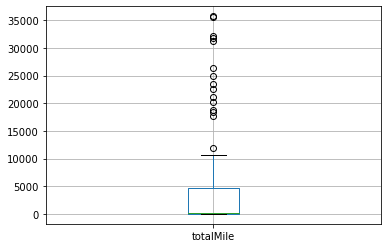

In [20]:
# Boxplot을 통해 분포 확인

bike_status_monthly_necessary.boxplot(column=['totalMile'])

#### 데이터의 중앙값이 1423.5로 평균에 비해 많이 작은 값이기에, Boxplot을 통해 확인한 결과 상당히 아래쪽으로 치우친 것을 확인할 수 있음

## 4. exchangeBatteryAnalysis 분석 진행

### 1) 유의미한 column 추출
#### 사용 column과 이유는 다음과 같습니다.
* exSerial: 배터리 교환기를 특정하기 위해 사용
* time: 데이터의 시점을 파악하기 위해 사용
* slots: 교환기의 총 슬롯 수 파악을 위해 사용
* slotNo: 교환기의 어느 슬롯을 사용하고 있는지 파악하기 위해 사용
* serial: 배터리를 특정하기 위해 사용
* inTime: 배터리가 언제 입고되었는지 파악하기 위해 사용
* inSoc: 배터리 교환기에 입고되었을 때 배터리가 어느 정도 전력량을 가지고 있었는지 파악하기 위해 사용
* soc: 해당 시점에 배터리 전력량을 파악하기 위해 사용

In [21]:
exchange_battery_analysis_necessary = exchange_battery_analysis[['exSerial', 'time', 'slots', 'slotNo', 'serial','inTime', 'inSoc', 'soc']]
exchange_battery_analysis_necessary

,exSerial,time,slots,slotNo,serial,inTime,inSoc,soc
0,SZ00C00017,2023-03-30 06:46:08,8,7,B2224L023S,2023-03-29 20:06:05,1001,1001
1,SZ00B00018,2023-03-30 06:46:09,8,3,BZLC00319M,2023-03-27 17:42:39,983,990
2,SZ00C00005,2023-03-30 06:46:09,8,3,BZLC00141S,2023-03-29 20:09:04,1000,1000
3,S2235Z0001,2023-03-30 06:46:09,8,5,BZLB00060M,2023-03-29 20:06:05,1002,1002
4,S2229Z0002,2023-03-30 06:46:09,8,1,BZLC00174M,2023-03-30 05:30:04,1001,1002
...,...,...,...,...,...,...,...,...
19995,SZ00B00006,2023-03-30 06:42:54,8,2,BZLC00161S,2023-03-29 19:41:05,1000,1000
19996,S2229Z0003,2023-03-30 06:42:54,8,4,B2224L004M,2023-03-29 20:05:05,1000,1000
19997,SZ00C00020,2023-03-30 06:42:54,8,6,BZLC00290M,2023-03-29 20:05:05,988,1000
19998,SZ00B00001,2023-03-30 06:42:54,8,2,BZLC00263S,2023-03-30 01:47:25,443,1000


### 2) 데이터셋 분석 진행
* "serial"을 고정하면, 하나의 슬롯에서 데이터의 변화를 파악할 수 있음
* "exSerial"을 고정하면, 하나의 교환기에서 배터리 교환이 어떤 식으로 이루어지는지 알 수 있음
* "exSerial"과 "time"을 고정하면, 하나의 교환기의 특정 시점에 어느 슬롯이 비어있는지 알 수 있음
* "slots"의 통계값을 분석하면, 교환기의 슬롯 통계를 알 수 있음
* "inSoc"의 통계값을 분석하면, 교환기에 배터리가 입고될 때 배터리가 어떻게 분포하는지 알 수 있음

In [22]:
# serial 고정

exchange_battery_analysis_necessary[exchange_battery_analysis_necessary['serial'] == "BZLC00276M"]

,exSerial,time,slots,slotNo,serial,inTime,inSoc,soc
124,SZ00C00001,2023-03-30 06:46:03,12,10,BZLC00276M,2023-03-30 04:31:50,360,909
990,SZ00C00001,2023-03-30 06:45:58,12,10,BZLC00276M,2023-03-30 04:31:50,360,909
1510,SZ00C00001,2023-03-30 06:45:53,12,10,BZLC00276M,2023-03-30 04:31:50,360,909
1990,SZ00C00001,2023-03-30 06:45:48,12,10,BZLC00276M,2023-03-30 04:31:50,360,908
2482,SZ00C00001,2023-03-30 06:45:43,12,10,BZLC00276M,2023-03-30 04:31:50,360,908
3072,SZ00C00001,2023-03-30 06:45:38,12,10,BZLC00276M,2023-03-30 04:31:50,360,907
3565,SZ00C00001,2023-03-30 06:45:33,12,10,BZLC00276M,2023-03-30 04:31:50,360,907
4038,SZ00C00001,2023-03-30 06:45:28,12,10,BZLC00276M,2023-03-30 04:31:50,360,907
4547,SZ00C00001,2023-03-30 06:45:23,12,10,BZLC00276M,2023-03-30 04:31:50,360,907
5136,SZ00C00001,2023-03-30 06:45:18,12,10,BZLC00276M,2023-03-30 04:31:50,360,906


* 배터리가 36% 남은 상태로 입고되었다가, 지속적으로 충전됨을 확인할 수 있음

In [23]:
# exSerial 고정

exchange_battery_analysis_necessary[exchange_battery_analysis_necessary['exSerial'] == "SZ00C00001"]

,exSerial,time,slots,slotNo,serial,inTime,inSoc,soc
17,SZ00C00001,2023-03-30 06:46:08,12,4,BZLC00162M,2023-03-30 01:41:33,639,1000
46,SZ00C00001,2023-03-30 06:46:08,12,3,BZLC00162S,2023-03-30 01:41:09,638,1000
75,SZ00C00001,2023-03-30 06:46:08,12,1,BZLC00184S,2023-03-30 05:05:30,349,746
124,SZ00C00001,2023-03-30 06:46:03,12,10,BZLC00276M,2023-03-30 04:31:50,360,909
147,SZ00C00001,2023-03-30 06:46:03,12,9,BZLC00276S,2023-03-30 04:31:45,349,861
...,...,...,...,...,...,...,...,...
19615,SZ00C00001,2023-03-30 06:42:58,12,6,BZLC00184M,2023-03-30 05:05:29,379,772
19643,SZ00C00001,2023-03-30 06:42:58,12,4,BZLC00162M,2023-03-30 01:41:33,639,1000
19662,SZ00C00001,2023-03-30 06:42:58,12,3,BZLC00162S,2023-03-30 01:41:09,638,1000
19683,SZ00C00001,2023-03-30 06:42:58,12,1,BZLC00184S,2023-03-30 05:05:30,349,733


* 교환기 슬롯의 상태 변화를 파악할 수 있음

In [24]:
# exSerial과 time 고정

exchange_battery_analysis_necessary[(exchange_battery_analysis_necessary['exSerial']=='SZ00C00001')&(exchange_battery_analysis_necessary['time']=='2023-03-30 06:42:58')]

,exSerial,time,slots,slotNo,serial,inTime,inSoc,soc
19138,SZ00C00001,2023-03-30 06:42:58,12,10,BZLC00276M,2023-03-30 04:31:50,360,897
19168,SZ00C00001,2023-03-30 06:42:58,12,9,BZLC00276S,2023-03-30 04:31:45,349,849
19196,SZ00C00001,2023-03-30 06:42:58,12,8,BZLC00220S,2023-03-29 20:02:05,1000,1000
19220,SZ00C00001,2023-03-30 06:42:58,12,7,BZLC00220M,2023-03-29 20:02:05,1000,1000
19615,SZ00C00001,2023-03-30 06:42:58,12,6,BZLC00184M,2023-03-30 05:05:29,379,772
19643,SZ00C00001,2023-03-30 06:42:58,12,4,BZLC00162M,2023-03-30 01:41:33,639,1000
19662,SZ00C00001,2023-03-30 06:42:58,12,3,BZLC00162S,2023-03-30 01:41:09,638,1000
19683,SZ00C00001,2023-03-30 06:42:58,12,1,BZLC00184S,2023-03-30 05:05:30,349,733


* 해당 시점에서 2, 5, 11, 12번 슬롯은 비어있음을 확인할 수 있음

In [25]:
# slot 분석

exchange_battery_analysis_necessary.drop_duplicates(["exSerial"])['slots'].value_counts()

8     80
12     4
Name: slots, dtype: int64

* 대부분의 교환기는 8개의 슬롯을 가지고 있고, 4개의 교환기만 12개의 슬롯을 가지고 있음

In [26]:
# inSoc 분석

print("Mean inSoc:", exchange_battery_analysis_necessary.drop_duplicates(["serial", 'inTime'])['inSoc'].mean())
print("Median inSoc:", exchange_battery_analysis_necessary.drop_duplicates(["serial", 'inTime'])['inSoc'].median())
print("Max inSoc:", exchange_battery_analysis_necessary.drop_duplicates(["serial", 'inTime'])['inSoc'].max())
print("Min inSoc:", exchange_battery_analysis_necessary.drop_duplicates(["serial", 'inTime'])['inSoc'].min())

Mean inSoc: 893.8077669902913
Median inSoc: 1000.0
Max inSoc: 1002
Min inSoc: 82


* 중간값이 1000이라는 의미는, 거의 대부분 배터리가 완충 상태로 입고됨 -> 확인 필요

<AxesSubplot:>

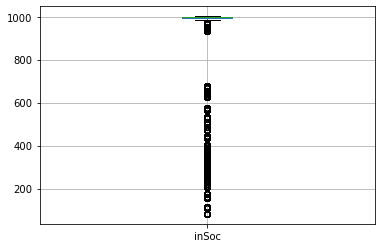

In [27]:
# Boxplot을 통해 분포 확인

exchange_battery_analysis_necessary.boxplot(column=['inSoc'])

* 배터리가 100% 충전된 값들을 제거 후 다시 분석 진행

Mean inSoc: 648.7564102564103
Median inSoc: 634.0
Max inSoc: 999
Min inSoc: 82


<AxesSubplot:>

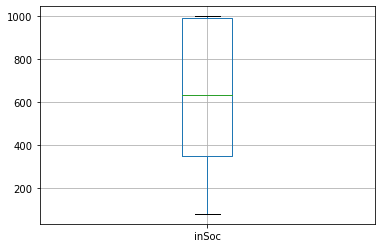

In [28]:
# 100%로 입고된 경우 제외하고 통계량 분석 진행

serial_uniq = exchange_battery_analysis_necessary.drop_duplicates(["serial", 'inTime'])

print("Mean inSoc:", serial_uniq[serial_uniq['inSoc'] < 1000]['inSoc'].mean())
print("Median inSoc:", serial_uniq[serial_uniq['inSoc'] < 1000]['inSoc'].median())
print("Max inSoc:", serial_uniq[serial_uniq['inSoc'] < 1000]['inSoc'].max())
print("Min inSoc:", serial_uniq[serial_uniq['inSoc'] < 1000]['inSoc'].min())

serial_uniq[serial_uniq['inSoc'] < 1000].boxplot(column=['inSoc'])

* 분포가 정상적으로 분포함을 확인

## 5. exchangeBatterySwap 분석 진행

### 1) 유의미한 column 추출
#### 사용 column과 이유는 다음과 같습니다.
* exSerial: 배터리 교환기를 특정하기 위해 사용
* time: 데이터의 시점을 파악하기 위해 사용
* biSerial: 배터리를 교환하는 이륜차를 특정하기 위해 사용
* inTripMile: 배터리를 교체하기 전에 얼마나 이동하였는지 파악하기 위해 사용
* inStTime: 배터리 입고가 언제 시작되었는지 파악하기 위해 사용
* inASerial: 입고된 배터리를 특정하기 위해 사용
* inASoc: 배터리 교환기에 입고되었을 때 배터리가 어느 정도 전력량을 가지고 있었는지 파악하기 위해 사용
* inASlot: 배터리가 교환기의 어느 슬롯에 입고되었는지 파악하기 위해 사용
* inBSerial: 입고된 배터리를 특정하기 위해 사용
* inBSoc: 배터리 교환기에 입고되었을 때 배터리가 어느 정도 전력량을 가지고 있었는지 파악하기 위해 사용
* inBSlot: 배터리가 교환기의 어느 슬롯에 입고되었는지 파악하기 위해 사용
* inEndTime: 배터리 입고가 언제 끝났는지 파악하기 위해 사용
* outCSerial: 출고된 배터리를 특정하기 위해 사용
* outCSoc: 배터리 교환기에서 출고되었을 때 배터리가 어느 정도 전력량을 가지고 있었는지 파악하기 위해 사용
* outCSlot: 배터리가 교환기의 어느 슬롯에서 출고되었는지 파악하기 위해 사용
* outDSerial: 출고된 배터리를 특정하기 위해 사용
* outDSoc: 배터리 교환기에서 출고되었을 때 배터리가 어느 정도 전력량을 가지고 있었는지 파악하기 위해 사용
* outDSlot: 배터리가 교환기의 어느 슬롯에서 출고되었는지 파악하기 위해 사용
* outEndTime: 배터리 출고가 언제 끝났는지 파악하기 위해 사용

In [30]:
exchange_battery_swap_necessary = exchange_battery_swap[['exSerial', 'time', 'biSerial', 'inTripMile', 'inStTime', 'inASerial', 'inASoc', 'inASlot', 'inBSerial', 'inBSoc', 'inBSlot', 'inEndTime', 'outCSerial', 'outCSoc', 'outCSlot', 'outDSerial', 'outDSoc', 'outDSlot', 'outEndTime']]
exchange_battery_swap_necessary

,exSerial,time,biSerial,inTripMile,inStTime,inASerial,inASoc,inASlot,inBSerial,inBSoc,inBSlot,inEndTime,outCSerial,outCSoc,outCSlot,outDSerial,outDSoc,outDSlot,outEndTime
0,S2222Z0004,2023-03-30 06:35:59,M2226B0025,58021.0,2023-03-30 06:35:40,BZLB00024S,251,2,BZLB00024M,249,1,2023-03-30 06:35:45,BZLC00117S,1001,3,BZLC00117M,1000,4,2023-03-30 06:35:59
1,SZ00B00020,2023-03-30 06:35:14,M2227Y0005,172440.0,2023-03-30 06:34:57,B2234L032S,276,6,B2234L032M,274,5,2023-03-30 06:35:02,BZLC00275M,1001,7,BZLC00275S,1000,8,2023-03-30 06:35:14
2,SZ00C00006,2023-03-30 06:34:48,M2134D0002,45869.0,2023-03-30 06:34:26,BZLC00138S,207,3,BZLC00138M,211,4,2023-03-30 06:34:34,BZLC00281S,1000,5,BZLC00281M,1000,6,2023-03-30 06:34:48
3,SZ00B00001,2023-03-30 06:19:08,M2227Y0001,139405.0,2023-03-30 06:18:50,BZLC00098M,630,5,BZLC00098S,628,6,2023-03-30 06:18:55,BZLC00270M,1000,7,NaN,0,8,2023-03-30 06:19:08
4,SZ00B00001,2023-03-30 06:19:08,M2227Y0001,139405.0,2023-03-30 06:18:50,BZLC00098M,630,5,BZLC00098S,628,6,2023-03-30 06:18:55,BZLC00270M,1000,7,BZLC00270S,1000,8,2023-03-30 06:19:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,S2221Z0010,2022-11-22 11:11:26,M2226B0039,371.0,2022-11-22 11:11:03,B2222L020S,495,8,B2222L020M,488,7,2022-11-22 11:11:07,B2225L021M,1001,5,B2225L021S,1001,6,2022-11-22 11:11:26
19996,S2211Z0001,2022-11-22 11:09:45,M2226B0035,241.0,2022-11-22 11:09:21,B2222L001M,339,6,B2222L001S,354,5,2022-11-22 11:09:25,BZLB00035M,1002,1,BZLB00035S,1001,2,2022-11-22 11:09:45
19997,S2224Z0001,2022-11-22 11:08:07,M2227Y0007,0.0,2022-11-22 11:07:46,B2233L004S,293,8,B2233L004M,320,7,2022-11-22 11:07:48,B2224L026S,1000,5,B2224L026M,1000,6,2022-11-22 11:08:07
19998,S2224Z0001,2022-11-22 10:48:23,M2226B0016,0.0,2022-11-22 10:48:01,BZLB00009S,329,1,BZLB00009M,327,2,2022-11-22 10:48:04,B2221L006M,1000,3,B2221L006S,1000,4,2022-11-22 10:48:23


### 2) 데이터셋 분석 진행
* "exSerial"을 고정하면, 하나의 교환기에서 배터리 교환이 어떤 식으로 이루어지는지 알 수 있음
* "biSerial"을 고정하면. 하나의 이륜차가 배터리 교환을 하는 패턴에 대한 분석이 가능함
* "inTripMile"의 통계량을 분석하면, 배터리 교환 전에 사용자들이 어느 정도 주행하는지 알 수 있음
* "inStTime"과 "inEndTime"의 차이를 분석하면, 배터리 입고에 어느 정도 시간이 걸리는지 알 수 있음
* "inStTime"과 "outEndTime"의 차이를 분석하면, 배터리 교환에 어느 정도 시간이 걸리는지 알 수 있음
* "inASoc"과 "inBSoc"의 통계량을 분석하면, 배터리 교환소에 입고되는 배터리의 전력량을 분석할 수 있음
* "outCSoc"과 "outDSoc"의 통계량을 분석하면, 배터리 교환소에서 출고되는 배터리의 전력량을 분석할 수 있음
* "time"을 특정 날짜로 고정하여, 특정 날짜의 교환 시점과 횟수에 대해 분석할 수 있음
* serial number 하나를 정해서, "inASerial", "inBSerial", "outCSerial", "outDSerial" 내 해당 serial number를 조사하면 특정 배터리의 이동을 알 수 있음

In [31]:
# exSerial 고정

exchange_battery_swap_necessary[exchange_battery_swap_necessary['exSerial'] == "SZ00B00001"]

,exSerial,time,biSerial,inTripMile,inStTime,inASerial,inASoc,inASlot,inBSerial,inBSoc,inBSlot,inEndTime,outCSerial,outCSoc,outCSlot,outDSerial,outDSoc,outDSlot,outEndTime
3,SZ00B00001,2023-03-30 06:19:08,M2227Y0001,139405.0,2023-03-30 06:18:50,BZLC00098M,630,5,BZLC00098S,628,6,2023-03-30 06:18:55,BZLC00270M,1000,7,NaN,0,8,2023-03-30 06:19:08
4,SZ00B00001,2023-03-30 06:19:08,M2227Y0001,139405.0,2023-03-30 06:18:50,BZLC00098M,630,5,BZLC00098S,628,6,2023-03-30 06:18:55,BZLC00270M,1000,7,BZLC00270S,1000,8,2023-03-30 06:19:08
53,SZ00B00001,2023-03-30 01:47:41,MZBAYB0540,0.0,2023-03-30 01:47:25,BZLC00263S,443,2,BZLC00263M,435,1,2023-03-30 01:47:29,B2223L009S,1000,5,B2223L009M,1001,6,2023-03-30 01:47:41
79,SZ00B00001,2023-03-29 15:04:54,M2226B0009,179821.0,2023-03-29 15:04:36,B2225L003M,176,3,B2225L003S,165,4,2023-03-29 15:04:40,BZLC00126M,1001,1,BZLC00126S,1000,2,2023-03-29 15:04:54
89,SZ00B00001,2023-03-29 12:26:28,MZBABB0513,109093.0,2023-03-29 12:26:12,BZLC00270M,383,7,BZLC00270S,384,8,2023-03-29 12:26:15,BZLC00268S,1002,3,BZLC00268M,1001,4,2023-03-29 12:26:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,SZ00B00001,2022-11-23 01:23:25,M2227Y0005,0.0,2022-11-23 01:23:01,B2222L008M,630,8,B2222L008S,632,4,2022-11-23 01:23:06,B2225L019S,1000,3,B2225L019M,1001,7,2022-11-23 01:23:25
19957,SZ00B00001,2022-11-23 00:43:19,M2227Y0008,0.0,2022-11-23 00:42:56,B2222L004M,230,2,B2222L004S,231,6,2022-11-23 00:43:01,B2233L040S,1001,1,B2233L040M,1001,5,2022-11-23 00:43:19
19976,SZ00B00001,2022-11-22 13:06:22,MZBABB0503,169.0,2022-11-22 13:05:58,B2225L019S,708,3,B2225L019M,706,7,2022-11-22 13:06:02,BZLB00020S,993,2,BZLB00020M,987,6,2022-11-22 13:06:22
19989,SZ00B00001,2022-11-22 11:50:57,M2226B0028,488.0,2022-11-22 11:50:32,B2233L040M,214,5,B2233L040S,234,1,2022-11-22 11:50:39,B2223L030M,1000,3,B2223L030S,1001,7,2022-11-22 11:50:57


* "inTripMile"이 0인 경우에 대한 확인 필요
* 3번 인덱스와 4번 인덱스의 "time"이 완전히 동일한데, 모든 값들도 동일하지만 outD 배터리의 값들이 동일하지 않음, 확인 필요

In [33]:
# "exSerial"의 개수를 count함으로써 배터리 교환기의 수요에 대해 대략적으로 파악 가능

exchange_battery_swap_necessary['exSerial'].value_counts()

SZ00B00005    1451
S2222Z0006    1085
S2221Z0004     873
SZ00B00001     840
S2222Z0005     792
              ... 
S2223Z0001       3
SZ00C00010       3
SZ00C00014       2
SZ00C00017       2
SZ00C00018       1
Name: exSerial, Length: 90, dtype: int64

* 약 4개월의 기간동안 1400번이 넘는 교환이 이루어진 교환기가 있는 반면, 한 번 밖에 교환하지 않은 교환기 역시 있음을 확인할 수 있다. 추후 수요 분산화를 할 때 데이터로 활용 가능할 것이라 생각
* 교환기의 시리얼넘버가 90개인데, 젠트로피 홈페이지에는 총 교환기가 81대라고 나와있음. 확인 필요

In [35]:
# biSerial 고정

exchange_battery_swap_necessary[exchange_battery_swap_necessary['biSerial'] == "M2227Y0001"]

,exSerial,time,biSerial,inTripMile,inStTime,inASerial,inASoc,inASlot,inBSerial,inBSoc,inBSlot,inEndTime,outCSerial,outCSoc,outCSlot,outDSerial,outDSoc,outDSlot,outEndTime
3,SZ00B00001,2023-03-30 06:19:08,M2227Y0001,139405.0,2023-03-30 06:18:50,BZLC00098M,630,5,BZLC00098S,628,6,2023-03-30 06:18:55,BZLC00270M,1000,7,NaN,0,8,2023-03-30 06:19:08
4,SZ00B00001,2023-03-30 06:19:08,M2227Y0001,139405.0,2023-03-30 06:18:50,BZLC00098M,630,5,BZLC00098S,628,6,2023-03-30 06:18:55,BZLC00270M,1000,7,BZLC00270S,1000,8,2023-03-30 06:19:08
37,S2222Z0005,2023-03-30 02:59:24,M2227Y0001,139147.0,2023-03-30 02:59:05,B2221L022S,264,1,B2221L022M,269,2,2023-03-30 02:59:12,BZLC00098S,1001,3,BZLC00098M,1001,4,2023-03-30 02:59:24
220,SZ00B00001,2023-03-28 13:02:00,M2227Y0001,138721.0,2023-03-28 13:01:42,BZLB00200S,365,3,BZLB00200M,358,4,2023-03-28 13:01:46,B2221L022M,1000,1,B2221L022S,1000,2,2023-03-28 13:02:00
316,SZ00B00001,2023-03-28 04:12:13,M2227Y0001,138312.0,2023-03-28 04:11:55,BZLC00139M,341,7,BZLC00139S,334,8,2023-03-28 04:11:59,BZLB00200M,1001,1,BZLB00200S,1001,2,2023-03-28 04:12:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18968,S2211Z0002,2022-11-30 09:39:49,M2227Y0001,0.0,2022-11-30 09:39:25,B2225L020S,580,2,B2225L020M,579,1,2022-11-30 09:39:29,BZLB00057M,997,5,BZLB00057S,1000,6,2022-11-30 09:39:49
18969,SZ00B00005,2022-11-30 09:39:10,M2227Y0001,0.0,2022-11-30 09:38:40,BZLB00021S,939,1,BZLB00021M,941,5,2022-11-30 09:38:47,B2225L020S,580,10,B2225L020M,579,9,2022-11-30 09:39:10
18986,S2228Z0001,2022-11-30 08:48:58,M2227Y0001,0.0,2022-11-30 08:48:31,B2234L054M,871,2,B2234L054S,740,1,2022-11-30 08:48:39,BZLB00021S,906,3,BZLB00021M,927,4,2022-11-30 08:48:58
19004,SZ00B00001,2022-11-30 05:12:54,M2227Y0001,0.0,2022-11-30 05:12:30,B2233L018S,999,2,B2233L018M,990,6,2022-11-30 05:12:36,B2234L054M,869,1,B2234L054S,875,5,2022-11-30 05:12:54


In [36]:
# inTripMile 분석

print("Mean inTripMile:", exchange_battery_swap_necessary['inTripMile'].mean())
print("Median inTripMile:", exchange_battery_swap_necessary['inTripMile'].median())
print("Max inTripMile:", exchange_battery_swap_necessary['inTripMile'].max())
print("Min inTripMile:", exchange_battery_swap_necessary['inTripMile'].min())

Mean inTripMile: 2.807273011801312e+26
Median inTripMile: 397.5
Max inTripMile: 4.73638911568281e+30
Min inTripMile: -1.691581474e-06


* Outlier로 인해 Mean값이 이상해짐을 확인 -> Outlier 제거 필요
* Min inTrpMile이 음수인 것 역시 이상함 -> 음수값 제거 필요
* 중간값인 39.7km는 상식적인 범주 내에 있음을 확인

<AxesSubplot:>

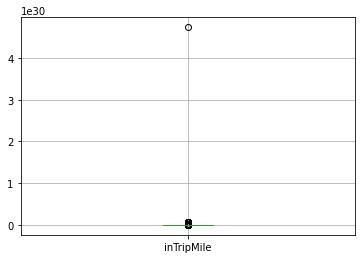

In [37]:
# Boxplot을 통해 분포 확인

exchange_battery_swap_necessary.boxplot(column=['inTripMile'])

In [41]:
# 이상치 1차로 제거 후 재확인

battery_swap_iter_1st = exchange_battery_swap_necessary[(exchange_battery_swap_necessary['inTripMile'] <= 1000000) & (exchange_battery_swap_necessary['inTripMile'] >= 0)]

print("Mean inTripMile:", battery_swap_iter_1st['inTripMile'].mean())
print("Median inTripMile:", battery_swap_iter_1st['inTripMile'].median())
print("Max inTripMile:", battery_swap_iter_1st['inTripMile'].max())
print("Min inTripMile:", battery_swap_iter_1st['inTripMile'].min())

Mean inTripMile: 46685.15051452937
Median inTripMile: 390.0
Max inTripMile: 287653.0
Min inTripMile: 0.0


* 배터리 교체 전 평균 주행거리가 4668km인 것이 불가능할 것이라 생각됨 -> inTripMile에 대한 정확한 정의 필요
* 마찬가지로, Max inTripMile이 28765km인 것 역시 불가능 -> Outlier 제거 후 분석 재진행

<AxesSubplot:>

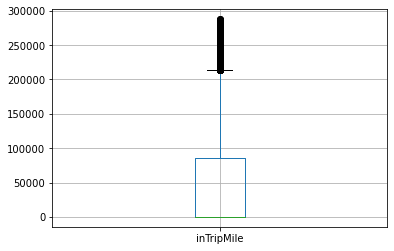

In [42]:
# Boxplot을 통해 분포 확인

battery_swap_iter_1st.boxplot(column=['inTripMile'])

* 3사분위수부터 5000km를 초과하는 값으로, median값에 비해 지나치게 치우친 값들이 존재 -> 10000km를 커트라인으로 잡고 분석 재진행

In [43]:
# 이상치 2차로 제거 후 재확인

battery_swap_iter_2nd = exchange_battery_swap_necessary[(exchange_battery_swap_necessary['inTripMile'] <= 100000) & (exchange_battery_swap_necessary['inTripMile'] >= 0)]

print("Mean inTripMile:", battery_swap_iter_2nd['inTripMile'].mean())
print("Median inTripMile:", battery_swap_iter_2nd['inTripMile'].median())
print("Max inTripMile:", battery_swap_iter_2nd['inTripMile'].max())

Mean inTripMile: 19828.12611484334
Median inTripMile: 0.0
Max inTripMile: 99970.0


* Median 값이 0으로, inTripMile이 절반 이상 0임을 확인 -> 분석 중단하고 inTripMile값에 대해 문의 후 재분석 진행

In [47]:
# "inStTime"과 "inEndTime"의 차이 분석

inDiff = exchange_battery_swap_necessary['inEndTime'] - exchange_battery_swap_necessary['inStTime']

print("Mean inDiff:", inDiff.mean())
print("Median inDiff:", inDiff.median())
print("Max inDiff:", inDiff.max())
print("Min inDiff:", inDiff.min())

Mean inDiff: 0 days 00:01:44.010850
Median inDiff: 0 days 00:00:05
Max inDiff: 21 days 22:45:31
Min inDiff: 0 days 00:00:00


* Max inDiff가 21일 22시간으로, 상식적으로 배터리 입고에 하루 이상 걸릴 수 없기에 Outlier로 판단 -> 제거 필요
* Median inDiff가 5초로, 배터리 입고에 5초 정도의 시간이 소요된다고 추측 가능

In [71]:
# 이상치 1차로 제거 후 재확인

inDiff_iter_1st = inDiff[inDiff<dt.timedelta(days=1)]

print("Mean inDiff:", inDiff_iter_1st.mean())
print("Median inDiff:", inDiff_iter_1st.median())
print("Max inDiff:", inDiff_iter_1st.max())
print("Min inDiff:", inDiff_iter_1st.min())

Mean inDiff: 0 days 00:00:09.194759737
Median inDiff: 0 days 00:00:05
Max inDiff: 0 days 07:44:19
Min inDiff: 0 days 00:00:00


<AxesSubplot:>

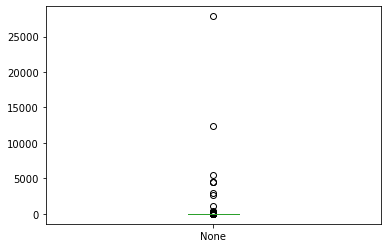

In [72]:
# Boxplot을 통해 초 단위의 분포 확인

inDiff_iter_1st.dt.seconds.plot(kind='box')

* 배터리 교환이 대부분 몇 초 이내로 이루어지기에, 1시간 이상 소요된 데이터들이 Outlier로 존재해 분포 확인이 어려울 -> Outlier 제거 후 재확인

In [73]:
# 이상치 2차로 제거 후 재확인

inDiff_iter_2nd = inDiff[inDiff<dt.timedelta(hours=1)]

print("Mean inDiff:", inDiff_iter_2nd.mean())
print("Median inDiff:", inDiff_iter_2nd.median())
print("Max inDiff:", inDiff_iter_2nd.max())
print("Min inDiff:", inDiff_iter_2nd.min())

Mean inDiff: 0 days 00:00:06.238133346
Median inDiff: 0 days 00:00:05
Max inDiff: 0 days 00:49:54
Min inDiff: 0 days 00:00:00


<AxesSubplot:>

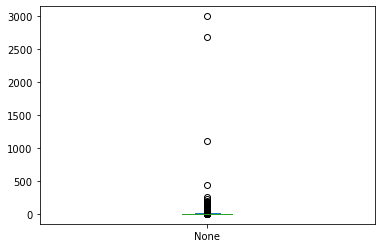

In [74]:
# Boxplot을 통해 초 단위의 분포 확인

inDiff_iter_2nd.dt.seconds.plot(kind='box')

* 마찬가지로, 분포 확인이 어려움 -> 5분(300초) 이상의 값들은 제거

In [75]:
# 이상치 3차로 제거 후 재확인

inDiff_iter_3rd = inDiff[inDiff<dt.timedelta(minutes=5)]

print("Mean inDiff:", inDiff_iter_3rd.mean())
print("Median inDiff:", inDiff_iter_3rd.median())
print("Max inDiff:", inDiff_iter_3rd.max())
print("Min inDiff:", inDiff_iter_3rd.min())

Mean inDiff: 0 days 00:00:05.878383110
Median inDiff: 0 days 00:00:05
Max inDiff: 0 days 00:04:15
Min inDiff: 0 days 00:00:00


<AxesSubplot:>

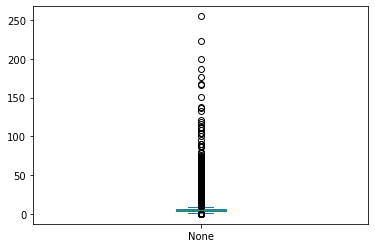

In [76]:
# Boxplot을 통해 초 단위의 분포 확인

inDiff_iter_3rd.dt.seconds.plot(kind='box')

In [77]:
# 남은 데이터의 개수 확인

len(inDiff_iter_3rd)

19989

* 대부분의 데이터가 보존된 것을 확인했기에, BoxPlot이 집중되어있는 30초 미만 데이터만 확인하기로 함

In [80]:
# 이상치 4차로 제거 후 재확인

inDiff_iter_4th = inDiff[inDiff<dt.timedelta(seconds=30)]

print("Mean inDiff:", inDiff_iter_4th.mean())
print("Median inDiff:", inDiff_iter_4th.median())
print("Max inDiff:", inDiff_iter_4th.max())
print("Min inDiff:", inDiff_iter_4th.min())

Mean inDiff: 0 days 00:00:05.486052366
Median inDiff: 0 days 00:00:05
Max inDiff: 0 days 00:00:29
Min inDiff: 0 days 00:00:00


<AxesSubplot:>

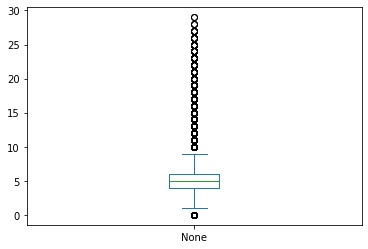

In [81]:
# Boxplot을 통해 초 단위의 분포 확인

inDiff_iter_4th.dt.seconds.plot(kind='box')

* 이상치로 판단된 10초 이상 데이터 제거 후 확인

In [83]:
# 이상치 4차로 제거 후 재확인

inDiff_iter_5th = inDiff[inDiff<=dt.timedelta(seconds=10)]

print("Mean inDiff:", inDiff_iter_5th.mean())
print("Median inDiff:", inDiff_iter_5th.median())
print("Max inDiff:", inDiff_iter_5th.max())
print("Min inDiff:", inDiff_iter_5th.min())

Mean inDiff: 0 days 00:00:04.937483344
Median inDiff: 0 days 00:00:05
Max inDiff: 0 days 00:00:10
Min inDiff: 0 days 00:00:00


<AxesSubplot:>

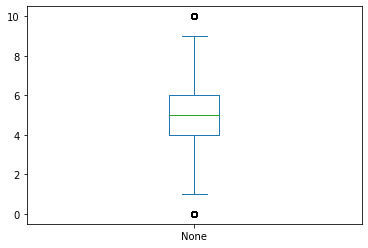

In [84]:
# Boxplot을 통해 초 단위의 분포 확인

inDiff_iter_5th.dt.seconds.plot(kind='box')

In [85]:
# 남은 데이터의 개수 확인

len(inDiff_iter_5th)

18763

* 대부분의 데이터가 보존되었음을 확인. 배터리 입고는 주로 10초 이내로 이루어지며, 5초동안 이루어지는 경우가 평균임을 알 수 있다.

In [86]:
# "inStTime"과 "outEndTime"의 차이 분석

useDiff = exchange_battery_swap_necessary['outEndTime'] - exchange_battery_swap_necessary['inStTime']

print("Mean useDiff:", useDiff.mean())
print("Median useDiff:", useDiff.median())
print("Max useDiff:", useDiff.max())
print("Min useDiff:", useDiff.min())

Mean useDiff: 2 days 21:47:06.406849999
Median useDiff: 0 days 00:00:23
Max useDiff: 19417 days 11:30:38
Min useDiff: 0 days 00:00:00


* Max useDiff가 19417일로, 극단적인 Outlier로 인해 평균 값이 이상하게 도출되었음을 확인 -> 제거 필요
* Median useDiff가 23초로, 상식적인 수준 내에서 배터리 교환 시간이 설정되었음을 확인

In [87]:
# 이상치 1차로 제거 후 재확인

useDiff_iter_1st = useDiff[useDiff<dt.timedelta(days=1)]

print("Mean useDiff:", useDiff_iter_1st.mean())
print("Median useDiff:", useDiff_iter_1st.median())
print("Max useDiff:", useDiff_iter_1st.max())
print("Min useDiff:", useDiff_iter_1st.min())

Mean useDiff: 0 days 00:00:35.673984796
Median useDiff: 0 days 00:00:23
Max useDiff: 0 days 21:45:04
Min useDiff: 0 days 00:00:00


<AxesSubplot:>

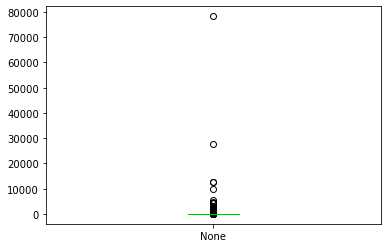

In [88]:
# Boxplot을 통해 초 단위의 분포 확인

useDiff_iter_1st.dt.seconds.plot(kind='box')

* inDiff와 마찬가지로 5분 이상 걸린 데이터 제거 후 확인

In [89]:
# 이상치 2차로 제거 후 재확인

useDiff_iter_2nd = useDiff[useDiff<dt.timedelta(minutes=5)]

print("Mean useDiff:", useDiff_iter_2nd.mean())
print("Median useDiff:", useDiff_iter_2nd.median())
print("Max useDiff:", useDiff_iter_2nd.max())
print("Min useDiff:", useDiff_iter_2nd.min())

Mean useDiff: 0 days 00:00:23.032400663
Median useDiff: 0 days 00:00:23
Max useDiff: 0 days 00:04:37
Min useDiff: 0 days 00:00:00


<AxesSubplot:>

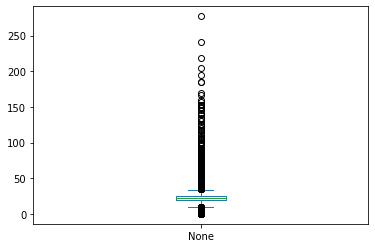

In [90]:
# Boxplot을 통해 초 단위의 분포 확인

useDiff_iter_2nd.dt.seconds.plot(kind='box')

In [91]:
# 남은 데이터의 개수 확인

len(useDiff_iter_2nd)

19907

* 대부분의 데이터가 보존된 것을 확인했기에, BoxPlot이 집중되어있는 30초 미만 데이터만 확인하기로 함

In [92]:
# 이상치 3차로 제거 후 재확인

useDiff_iter_3rd = useDiff[useDiff<dt.timedelta(seconds=30)]

print("Mean useDiff:", useDiff_iter_3rd.mean())
print("Median useDiff:", useDiff_iter_3rd.median())
print("Max useDiff:", useDiff_iter_3rd.max())
print("Min useDiff:", useDiff_iter_3rd.min())

Mean useDiff: 0 days 00:00:21.603600214
Median useDiff: 0 days 00:00:22
Max useDiff: 0 days 00:00:29
Min useDiff: 0 days 00:00:00


<AxesSubplot:>

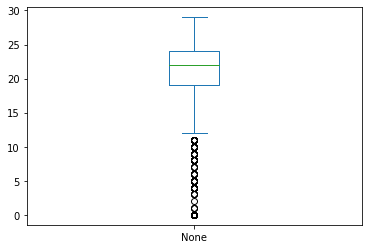

In [93]:
# Boxplot을 통해 초 단위의 분포 확인

useDiff_iter_3rd.dt.seconds.plot(kind='box')

In [94]:
# 남은 데이터의 개수 확인

len(useDiff_iter_3rd)

18610

* 대부분의 데이터가 보존되었음을 확인. 교환기 사용은 주로 20~25초 이내로 이루어짐을 확인할 수 있다.

In [96]:
# "inASoc"과 "inBSoc"의 통계량 분석

print("Mean inASoc:", exchange_battery_swap_necessary['inASoc'].mean())
print("Median inASoc:", exchange_battery_swap_necessary['inASoc'].median())
print("Max inASoc:", exchange_battery_swap_necessary['inASoc'].max())
print("Min inASoc:", exchange_battery_swap_necessary['inASoc'].min())
print("")
print("Mean inBSoc:", exchange_battery_swap_necessary['inBSoc'].mean())
print("Median inBSoc:", exchange_battery_swap_necessary['inBSoc'].median())
print("Max inBSoc:", exchange_battery_swap_necessary['inBSoc'].max())
print("Min inBSoc:", exchange_battery_swap_necessary['inBSoc'].min())

Mean inASoc: 426.65115
Median inASoc: 377.0
Max inASoc: 1002
Min inASoc: 0

Mean inBSoc: 427.8023
Median inBSoc: 378.0
Max inBSoc: 1002
Min inBSoc: 0


<AxesSubplot:>

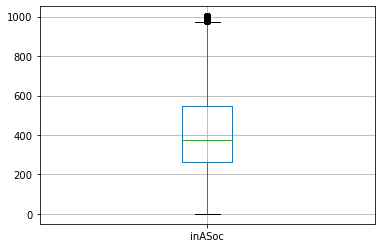

In [97]:
# Boxplot을 통해 분포 확인

exchange_battery_swap_necessary.boxplot(column=['inASoc'])

<AxesSubplot:>

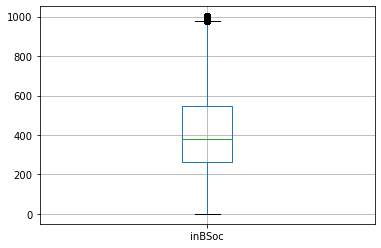

In [98]:
# Boxplot을 통해 분포 확인

exchange_battery_swap_necessary.boxplot(column=['inBSoc'])

* 대부분 배터리 잔량이 30~55%일 때 배터리를 교체하는 것으로 확인됨

In [99]:
# "outCSoc"과 "outDSoc"의 통계량 분석

print("Mean outCSoc:", exchange_battery_swap_necessary['outCSoc'].mean())
print("Median outCSoc:", exchange_battery_swap_necessary['outCSoc'].median())
print("Max outCSoc:", exchange_battery_swap_necessary['outCSoc'].max())
print("Min outCSoc:", exchange_battery_swap_necessary['outCSoc'].min())
print("")
print("Mean outDSoc:", exchange_battery_swap_necessary['outDSoc'].mean())
print("Median outDSoc:", exchange_battery_swap_necessary['outDSoc'].median())
print("Max outDSoc:", exchange_battery_swap_necessary['outDSoc'].max())
print("Min outDSoc:", exchange_battery_swap_necessary['outDSoc'].min())

Mean outCSoc: 972.39315
Median outCSoc: 1000.0
Max outCSoc: 1002
Min outCSoc: 0

Mean outDSoc: 971.8911
Median outDSoc: 1000.0
Max outDSoc: 1002
Min outDSoc: 0


* 출고된 배터리의 잔량이 0%인 것은 정상적이지 않은 상황이라고 판단됨 -> Boxplot 확인 후 제거 필요

<AxesSubplot:>

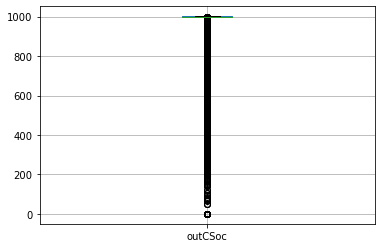

In [100]:
# Boxplot을 통해 분포 확인

exchange_battery_swap_necessary.boxplot(column=['outCSoc'])

<AxesSubplot:>

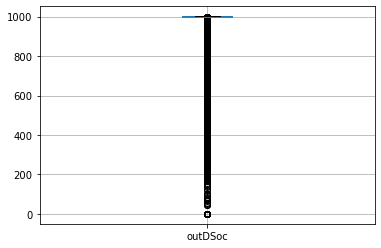

In [101]:
# Boxplot을 통해 분포 확인

exchange_battery_swap_necessary.boxplot(column=['outDSoc'])

* 출고된 배터리의 대부분이 100% 주위에 분포하고, 그러한 상황이 정상적이라고 판단 -> 배터리의 잔량이 90% 이하로 출고된 데이터 제거 후 확인

In [102]:
# 이상치 1차로 제거 후 재확힌

outSoc_iter_1st = exchange_battery_swap_necessary[(exchange_battery_swap_necessary['outCSoc'] > 900) & (exchange_battery_swap_necessary['outDSoc'] > 900)]

print("Mean outCSoc:", outSoc_iter_1st['outCSoc'].mean())
print("Median outCSoc:", outSoc_iter_1st['outCSoc'].median())
print("Max outCSoc:", outSoc_iter_1st['outCSoc'].max())
print("Min outCSoc:", outSoc_iter_1st['outCSoc'].min())
print("")
print("Mean outDSoc:", outSoc_iter_1st['outDSoc'].mean())
print("Median outDSoc:", outSoc_iter_1st['outDSoc'].median())
print("Max outDSoc:", outSoc_iter_1st['outDSoc'].max())
print("Min outDSoc:", outSoc_iter_1st['outDSoc'].min())

Mean outCSoc: 996.8704496222327
Median outCSoc: 1000.0
Max outCSoc: 1002
Min outCSoc: 901

Mean outDSoc: 996.6268293971575
Median outDSoc: 1000.0
Max outDSoc: 1002
Min outDSoc: 901


<AxesSubplot:>

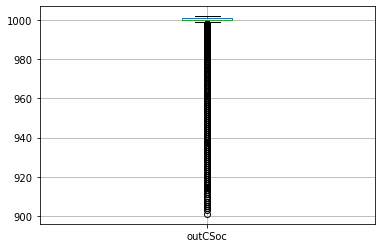

In [103]:
# Boxplot을 통해 분포 확인

outSoc_iter_1st.boxplot(column=['outCSoc'])

<AxesSubplot:>

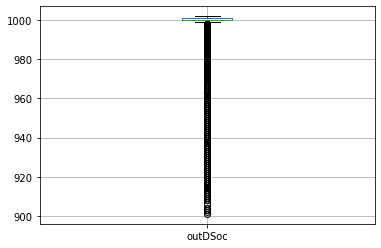

In [104]:
# Boxplot을 통해 분포 확인

outSoc_iter_1st.boxplot(column=['outDSoc'])

In [105]:
# 남은 데이터의 개수 확인

len(outSoc_iter_1st)

18927

* 대부분의 배터리가 100% 완충된 상태로 출고되지만, 90% 이하로 충전된 상태에서도 출고될 수 있으므로 추가 분석 필요
* 하지만 배터리의 잔량이 30% 이하일 때 출고되는 값들은 정상적이지 않을 것이라 판단되긴 함

In [126]:
# "time" 고정

exchange_battery_swap_necessary[exchange_battery_swap_necessary['time'].dt.date==dt.date(2023, 3, 1)]

,exSerial,time,biSerial,inTripMile,inStTime,inASerial,inASoc,inASlot,inBSerial,inBSoc,inBSlot,inEndTime,outCSerial,outCSoc,outCSlot,outDSerial,outDSoc,outDSlot,outEndTime
4490,SZ00B00023,2023-03-01 23:49:41,M2226B0041,261379.0,2023-03-01 23:49:23,BZLC00124S,217,4,BZLC00124M,214,8,2023-03-01 23:49:26,B2222L026M,1000,3,B2222L026S,1000,7,2023-03-01 23:49:41
4491,SZ00B00015,2023-03-01 23:40:00,MZBAYB0509,115645.0,2023-03-01 23:39:43,BZLC00128M,540,8,BZLC00128S,540,7,2023-03-01 23:39:47,B2233L007S,1001,5,B2233L007M,1001,6,2023-03-01 23:40:00
4492,S2230Z0001,2023-03-01 23:05:37,MZBABB0505,70430.0,2023-03-01 23:05:21,BZLC00110S,465,4,BZLC00110M,464,8,2023-03-01 23:05:24,BZLC00153S,1002,1,BZLC00153M,966,2,2023-03-01 23:05:37
4493,S2222Z0006,2023-03-01 22:55:49,M2226B0007,34697.0,2023-03-01 22:55:32,BZLC00149S,615,1,BZLC00149M,622,2,2023-03-01 22:55:37,BZLB00120M,1000,5,BZLB00120S,1001,6,2023-03-01 22:55:49
4494,SZ00B00020,2023-03-01 22:53:37,MZBAYB0516,124015.0,2023-03-01 22:53:19,BZLC00035M,712,2,BZLC00035S,724,1,2023-03-01 22:53:24,BZLC00100S,1001,3,BZLC00100M,1000,4,2023-03-01 22:53:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,SZ00B00010,2023-03-01 00:49:20,MZBAYB0537,80636.0,2023-03-01 00:49:00,BZLB00059M,209,6,BZLB00059S,206,5,2023-03-01 00:49:08,BZLC00106S,1000,7,BZLC00106M,1000,8,2023-03-01 00:49:20
4646,S2221Z0005,2023-03-01 00:44:17,M2226B0029,0.0,2023-03-01 00:43:59,BZLB00300S,449,2,BZLB00300M,451,1,2023-03-01 00:44:05,BZLB00037S,1001,7,BZLB00037M,1002,8,2023-03-01 00:44:17
4647,S2229Z0005,2023-03-01 00:40:03,M2227Y0005,131667.0,2023-03-01 00:39:47,BZLC00155S,327,2,BZLC00155M,362,1,2023-03-01 00:39:51,B2225L002S,1001,5,B2225L002M,1001,6,2023-03-01 00:40:03
4648,S2221Z0003,2023-03-01 00:29:03,MZBATB0524,133612.0,2023-03-01 00:28:47,BZLB00017S,425,7,BZLB00017M,430,8,2023-03-01 00:28:51,BZLC00097S,1001,3,BZLC00097M,1001,4,2023-03-01 00:29:03


* 3월 1일 하루동안 160번의 배터리 교체가 일어났음을 확인

In [134]:
# 2023년 3월 한 달간 일별 배터리 교환 횟수 분석

time_count_list = [len(exchange_battery_swap_necessary[exchange_battery_swap_necessary['time'].dt.date==dt.date(2023, 3, x)]) for x in range(1, 32)]
time_list = [dt.date(2023, 3, x) for x in range(1,32)]
time_count_df = pd.DataFrame(time_count_list, index = time_list, columns=['일일 배터리 교환 수'])
time_count_df

,일일 배터리 교환 수
2023-03-01,160
2023-03-02,188
2023-03-03,169
2023-03-04,159
2023-03-05,159
2023-03-06,160
2023-03-07,135
2023-03-08,127
2023-03-09,156
2023-03-10,169


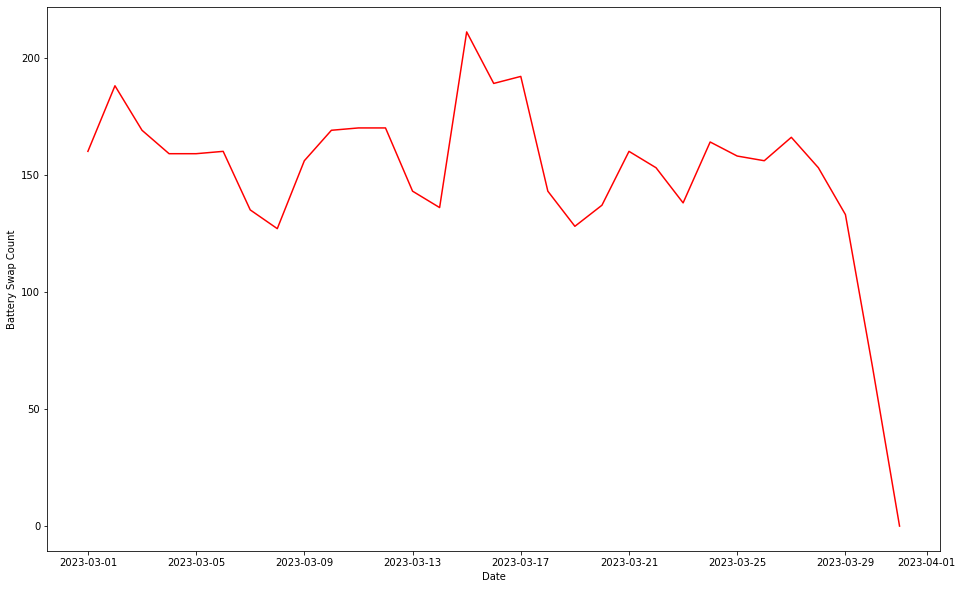

In [139]:
# 3월 한 달간 일별 배터리 교환 횟수 Plot 확인

plt.figure(figsize=(16,10))
plt.plot(time_list, time_count_list, 'r')
plt.xlabel('Date')
plt.ylabel('Battery Swap Count')
plt.show()

* 3월 한 달간 배터리 교환 횟수 분포는 다음과 같음을 확인할 수 있음

In [154]:
# serial number 하나를 정해서, "inASerial", "inBSerial", "outCSerial", "outDSerial" 내 해당 serial number 조사

def draw_color_cell(x,color):
    if x=='BZLC00124S':
        color = f'background-color:{color}'
        return color
    else:
        return ''

BZLC00124S = exchange_battery_swap_necessary[(exchange_battery_swap_necessary['inASerial'] == 'BZLC00124S') | 
                                (exchange_battery_swap_necessary['inBSerial'] == 'BZLC00124S') | 
                                (exchange_battery_swap_necessary['outCSerial'] == 'BZLC00124S') | 
                                (exchange_battery_swap_necessary['outDSerial'] == 'BZLC00124S')]
BZLC00124S.style.applymap(draw_color_cell,color='#ff9090')

,exSerial,time,biSerial,inTripMile,inStTime,inASerial,inASoc,inASlot,inBSerial,inBSoc,inBSlot,inEndTime,outCSerial,outCSoc,outCSlot,outDSerial,outDSoc,outDSlot,outEndTime
3349,SZ00B00005,2023-03-09 05:19:49,M2226B0007,39205.000000,2023-03-09 05:19:26,BZLB00287M,510,2,BZLB00287S,508,1,2023-03-09 05:19:31,BZLC00124S,1002,5,BZLC00124M,1001,6,2023-03-09 05:19:49
3392,SZ00B00005,2023-03-09 00:38:27,MZBAYB0509,0.000000,2023-03-09 00:37:58,BZLC00124M,0,6,BZLC00124S,6,5,2023-03-09 00:38:09,BZLC00222S,1000,10,BZLC00222M,1000,9,2023-03-09 00:38:27
3637,SZ00B00005,2023-03-07 02:38:04,MZBAYB0509,122605.000000,2023-03-07 02:37:42,B2233L016S,539,4,B2233L016M,537,3,2023-03-07 02:37:46,BZLC00124S,1002,5,BZLC00124M,1001,6,2023-03-07 02:38:04
3683,SZ00B00005,2023-03-06 12:22:44,M2226B0007,38937.000000,2023-03-06 12:22:24,BZLC00124M,808,6,BZLC00124S,802,5,2023-03-06 12:22:28,BZLB00287M,1000,10,BZLB00287S,1000,9,2023-03-06 12:22:44
3686,S2221Z0003,2023-03-06 12:18:39,M2226B0007,38924.000000,2023-03-06 12:18:20,BZLC00184M,299,7,BZLC00184S,284,8,2023-03-06 12:18:26,BZLC00124M,831,5,BZLC00124S,827,6,2023-03-06 12:18:39
3710,S2221Z0003,2023-03-06 10:52:57,MZBABB0504,0.000000,2023-03-06 10:52:26,BZLC00124S,342,6,BZLC00124M,350,5,2023-03-06 10:52:45,BZLB00182M,1002,1,BZLB00182S,1002,2,2023-03-06 10:52:57
3822,S2221Z0003,2023-03-05 15:25:49,MZBABB0504,0.000000,2023-03-05 15:25:23,BZLB00292M,496,7,BZLB00292S,503,8,2023-03-05 15:25:36,BZLC00124S,1002,5,BZLC00124M,1002,6,2023-03-05 15:25:49
3858,S2221Z0003,2023-03-05 11:07:50,M2226B0039,136579.000000,2023-03-05 11:07:33,BZLC00124M,156,6,BZLC00124S,158,5,2023-03-05 11:07:36,B2233L030M,1000,1,B2233L030S,1000,2,2023-03-05 11:07:50
3907,S2221Z0008,2023-03-05 07:22:53,M2226B0039,136089.000000,2023-03-05 07:22:35,B2222L030M,322,6,B2222L030S,321,5,2023-03-05 07:22:40,BZLC00124M,1002,3,BZLC00124S,1001,4,2023-03-05 07:22:53
3945,S2221Z0008,2023-03-05 03:28:14,M2226B0003,49895.000000,2023-03-05 03:27:57,BZLC00124S,145,4,BZLC00124M,163,3,2023-03-05 03:28:01,BZLC00133S,1001,7,BZLC00133M,1001,8,2023-03-05 03:28:14


#### "BZLC00124S" 배터리에 대해 분석
* 배터리가 정상적으로 입고->출고->입고->출고 순으로 반복되는 것을 알 수 있음
* 입고된 자리에서 출고되어야 하기에 입고 시 (교환기, 슬롯) 시리얼과 출고 시 (교환기, 슬롯) 시리얼이 같은 것을 확인할 수 있음
* 인덱스 4597번의 경우, 100%인 상황에서 입고되었다가 다시 곧바로 출고된 것을 확인할 수 있는데, 해당 경우에 대한 추가적인 분석이 필요
* 2월 중순부터 3월 말까지 해당 배터리는 총 31번 교환됨

## 6. exchangeBatterySwapMonthly 분석 진행

### 1) 유의미한 column 추출
#### 사용 column과 이유는 다음과 같습니다.
* biSerial: 배터리를 교환하는 이륜차를 특정하기 위해 사용
* totalCount: 월별 배터리 교환 횟수를 파악하기 위해 사용
* time: 배터리 교환 시기를 특정하기 위해 사용

In [158]:
exchange_battery_swap_monthly_necessary = exchange_battery_swap_monthly[['biSerial', 'totalCount', 'time']]
exchange_battery_swap_monthly_necessary

,biSerial,totalCount,time
0,MZBAGB0548,5,2023-01-31 15:00:00
1,M2117D0008,7,2023-01-31 15:00:00
2,MZBAWB0547,123,2023-01-31 15:00:00
3,MZBATB0527,47,2023-01-31 15:00:00
4,M2226B0008,1,2023-01-31 15:00:00
...,...,...,...
525,M2226B0014,13,2022-09-30 15:00:00
526,M2226B0025,16,2022-09-30 15:00:00
527,M2227Y0004,66,2022-09-30 15:00:00
528,M2227Y0007,66,2022-09-30 15:00:00


### 2) 데이터셋 분석 진행
* "biSerial"을 고정하면, 특정 사용자의 배터리 교환 횟수를 분석할 수 있음
* "time"을 고정하면, 특정 월의 배터리 교환횟수를 알 수 있음
* "totalCount"를 분석하면 월별 교환횟수 정보를 알 수 있음

In [160]:
# "biSerial" 고정

exchange_battery_swap_monthly_necessary[exchange_battery_swap_monthly_necessary['biSerial'] == 'M2227Y0004']

,biSerial,totalCount,time
104,M2227Y0004,79,2023-01-31 15:00:00
132,M2227Y0004,52,2022-12-31 15:00:00
328,M2227Y0004,88,2022-11-30 15:00:00
433,M2227Y0004,73,2022-10-31 15:00:00
527,M2227Y0004,66,2022-09-30 15:00:00


* "M2227Y0004" 사용자의 월별 배터리 교환 횟수를 알 수 있음

In [171]:
# "time" 고정

battery_swap_jan = exchange_battery_swap_monthly_necessary[exchange_battery_swap_monthly_necessary['time'].dt.strftime('%Y-%m') == dt.date(2023, 1, 1).strftime('%Y-%m')]
battery_swap_jan

,biSerial,totalCount,time
0,MZBAGB0548,5,2023-01-31 15:00:00
1,M2117D0008,7,2023-01-31 15:00:00
2,MZBAWB0547,123,2023-01-31 15:00:00
3,MZBATB0527,47,2023-01-31 15:00:00
4,M2226B0008,1,2023-01-31 15:00:00
...,...,...,...
104,M2227Y0004,79,2023-01-31 15:00:00
105,MZBATB0528,21,2023-01-31 15:00:00
106,M2226B0025,3,2023-01-31 15:00:00
107,MZBAGB0549,1,2023-01-31 15:00:00


* 2023년 1월에 109명의 사용자가 배터리 교환을 진행함

In [172]:
# 2023년 1월의 "totalCount" 분석

print("Mean totalCount_Jan:", battery_swap_jan['totalCount'].mean())
print("Median totalCount_Jan:", battery_swap_jan['totalCount'].median())
print("Max totalCount_Jan:", battery_swap_jan['totalCount'].max())
print("Min totalCount_Jan:", battery_swap_jan['totalCount'].min())

Mean totalCount_Jan: 40.559633027522935
Median totalCount_Jan: 26.0
Max totalCount_Jan: 157
Min totalCount_Jan: 1


* 2023년 1월에 최소 배터리 교환 횟수는 1회이고, 최대 교환 횟수는 157회임. 중간값은 26이며 평균은 40회임을 알 수 있다.

In [173]:
# "totalCount" 분석

print("Mean totalCount:", exchange_battery_swap_monthly_necessary['totalCount'].mean())
print("Median totalCount:", exchange_battery_swap_monthly_necessary['totalCount'].median())
print("Max totalCount:", exchange_battery_swap_monthly_necessary['totalCount'].max())
print("Min totalCount:", exchange_battery_swap_monthly_necessary['totalCount'].min())

Mean totalCount: 37.12830188679245
Median totalCount: 24.0
Max totalCount: 187
Min totalCount: 1


<AxesSubplot:>

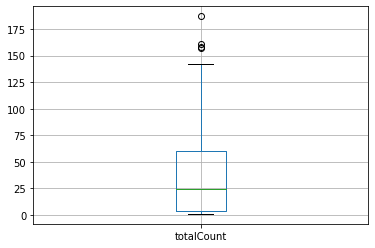

In [175]:
# Boxplot 확인

exchange_battery_swap_monthly_necessary.boxplot(column=['totalCount'])

* 배터리 교환은 월에 주로 1~55회 이내로 이루어짐을 알 수 있다.